In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
x1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
y1=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Cluster Number 1901-2010.csv",index_col=0)
x2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
y2=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Cluster Number 2011-2022.csv",index_col=0)


In [4]:
x=pd.concat([x1,x2])
x=x.set_index(i for i in range(122))
y=pd.concat([y1,y2])
y=y.set_index(i for i in range(122))

In [7]:
# x_train=x[:110]
# x_test=x[110:]
# y_train=y[:110]
# y_test=y[110:]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred = model.predict(x_test)
y_pred

array([2, 3, 2, 6, 6, 3, 0, 6, 3, 3, 3, 0, 8], dtype=int64)

In [11]:
y_array = y_test.values.ravel()
y_array

array([3, 3, 2, 3, 1, 1, 3, 1, 3, 8, 3, 4, 2], dtype=int64)

In [12]:
accuracy_score(y_pred,y_array)

0.3076923076923077

In [13]:
clusters=[]
for i in range(1,10):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\IMD Rainfall Clusters Images\Cluster {i}.png"))
    

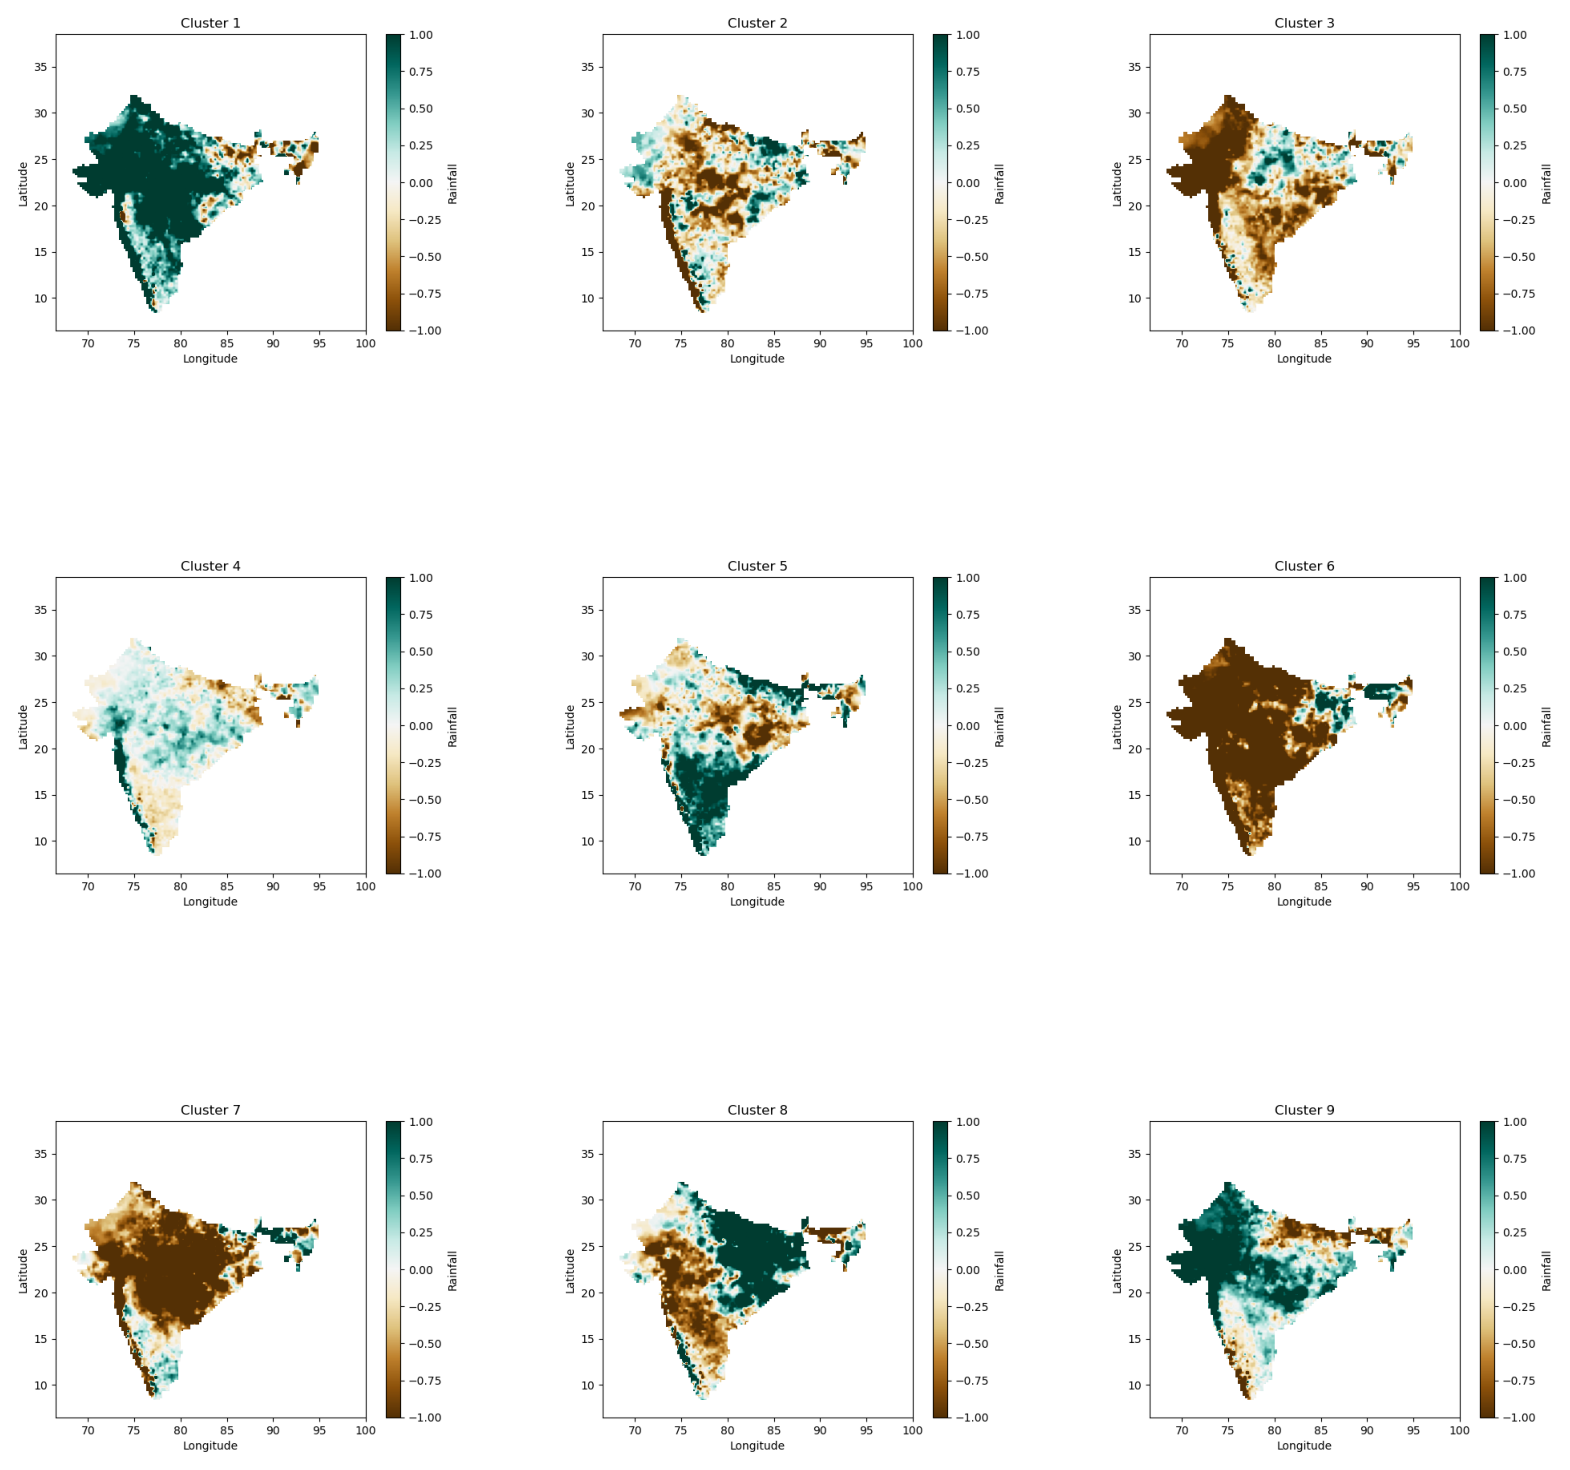

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off') 

In [15]:
indexes_list = y_test.index.tolist()
indexes_list

[18, 45, 47, 89, 4, 40, 62, 107, 31, 55, 53, 119, 10]

In [17]:
actual_years_map=[]
for i in indexes_list:
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{i+1901} Rainfall.png"))
                        

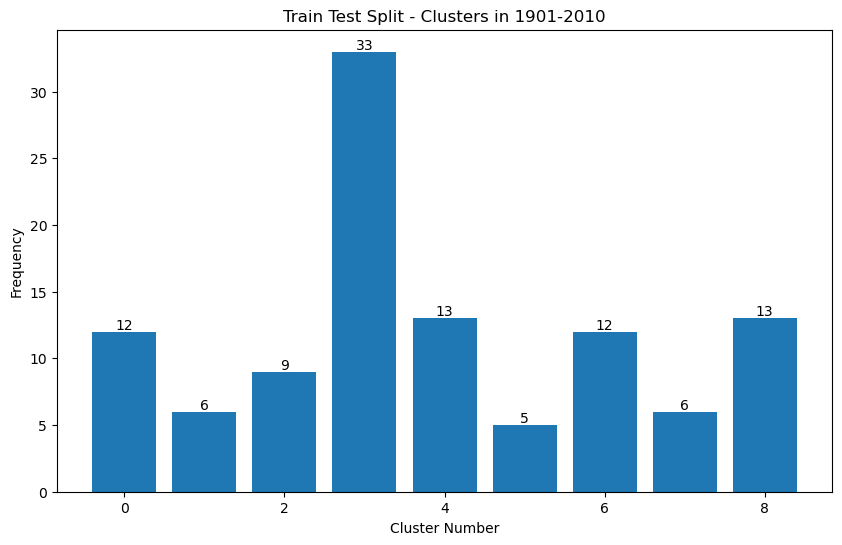

In [18]:
cluster_counts = y_train['Cluster Number'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bars1=plt.bar(cluster_counts.index, cluster_counts.values)
plt.title("Train Test Split - Clusters in 1901-2010")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars1, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
    
# plt.savefig('Train Test Split - Clusters in 1901-2010.png')

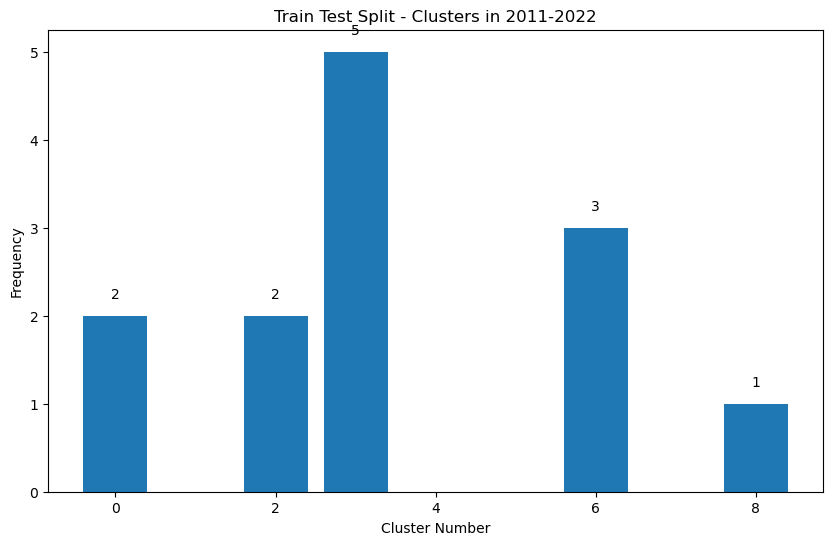

In [19]:
unique_values, value_counts = np.unique(y_pred, return_counts=True)
plt.figure(figsize=(10, 6))  # Set the figure size
bars=plt.bar(unique_values, value_counts)
plt.title("Train Test Split - Clusters in 2011-2022")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
# plt.savefig('Train Test Split - Clusters in 2011-2022.png')


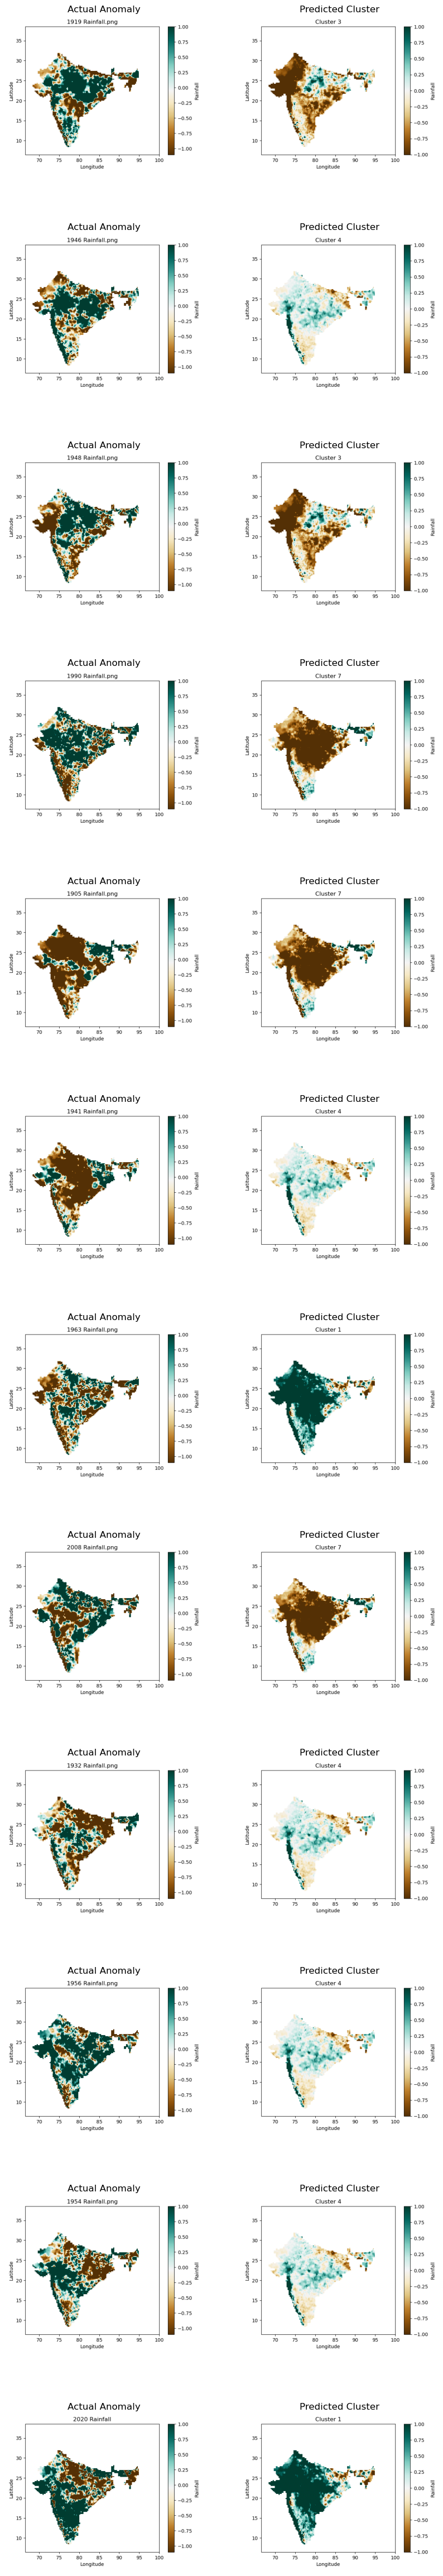

In [21]:
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


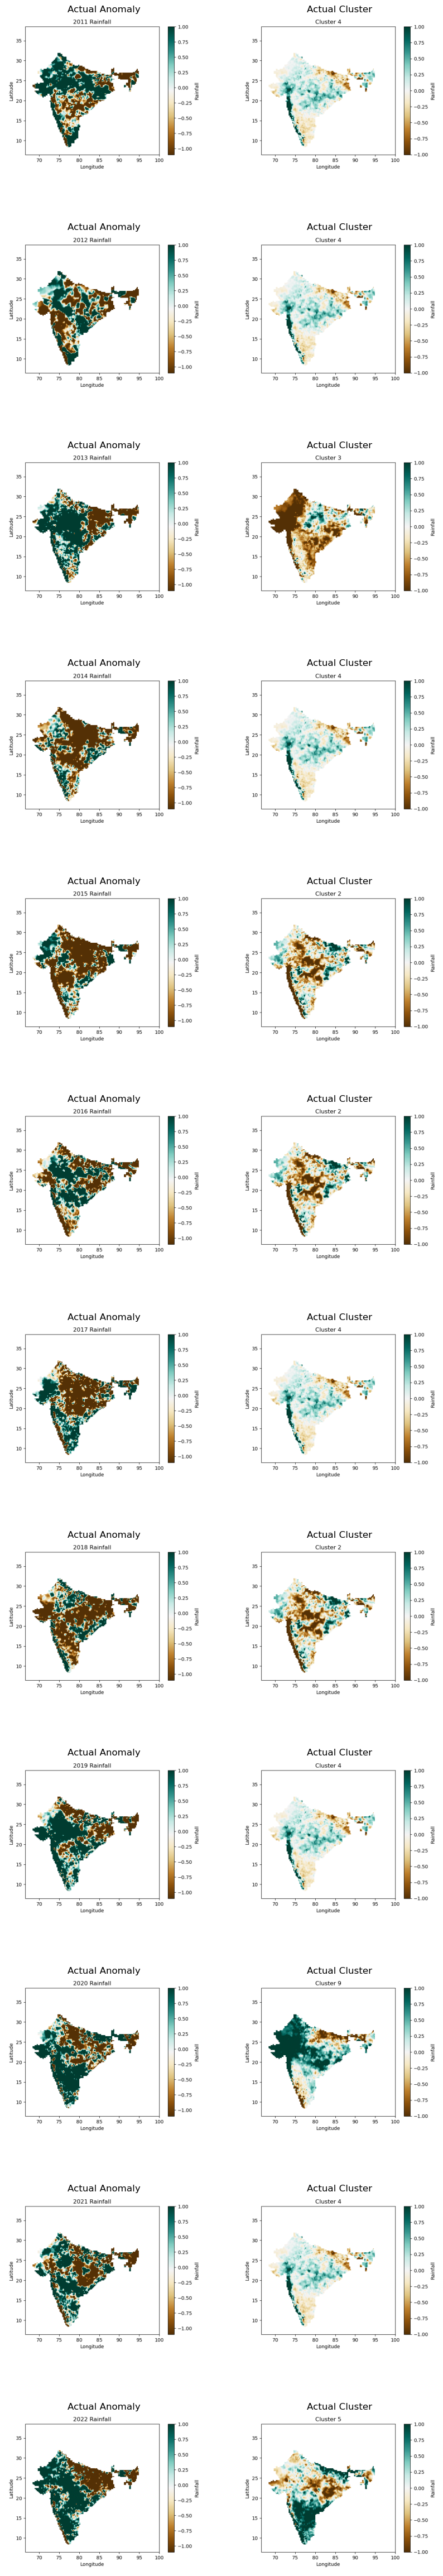

In [31]:
#Actual Years
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

In [ ]:
# fig, axes = plt.subplots(2, 12, figsize=(100, 10)) 
# j=0
# k=0
# for i, ax in enumerate(axes.ravel()):
    
#     if(i>=12):
#         pred_clus=y_pred[k]
#         ax.imshow(clusters[pred_clus])
#         ax.axis('off')
#         ax.set_title(f'Predicted Cluster')
#         k+=1
#     else:
#         ax.imshow(actual_years_map[j])
#         ax.axis('off')
#         ax.set_title('Actual Anomaly')
#         j+=1

# #plt.savefig('Train Test Split - Prediction.png')


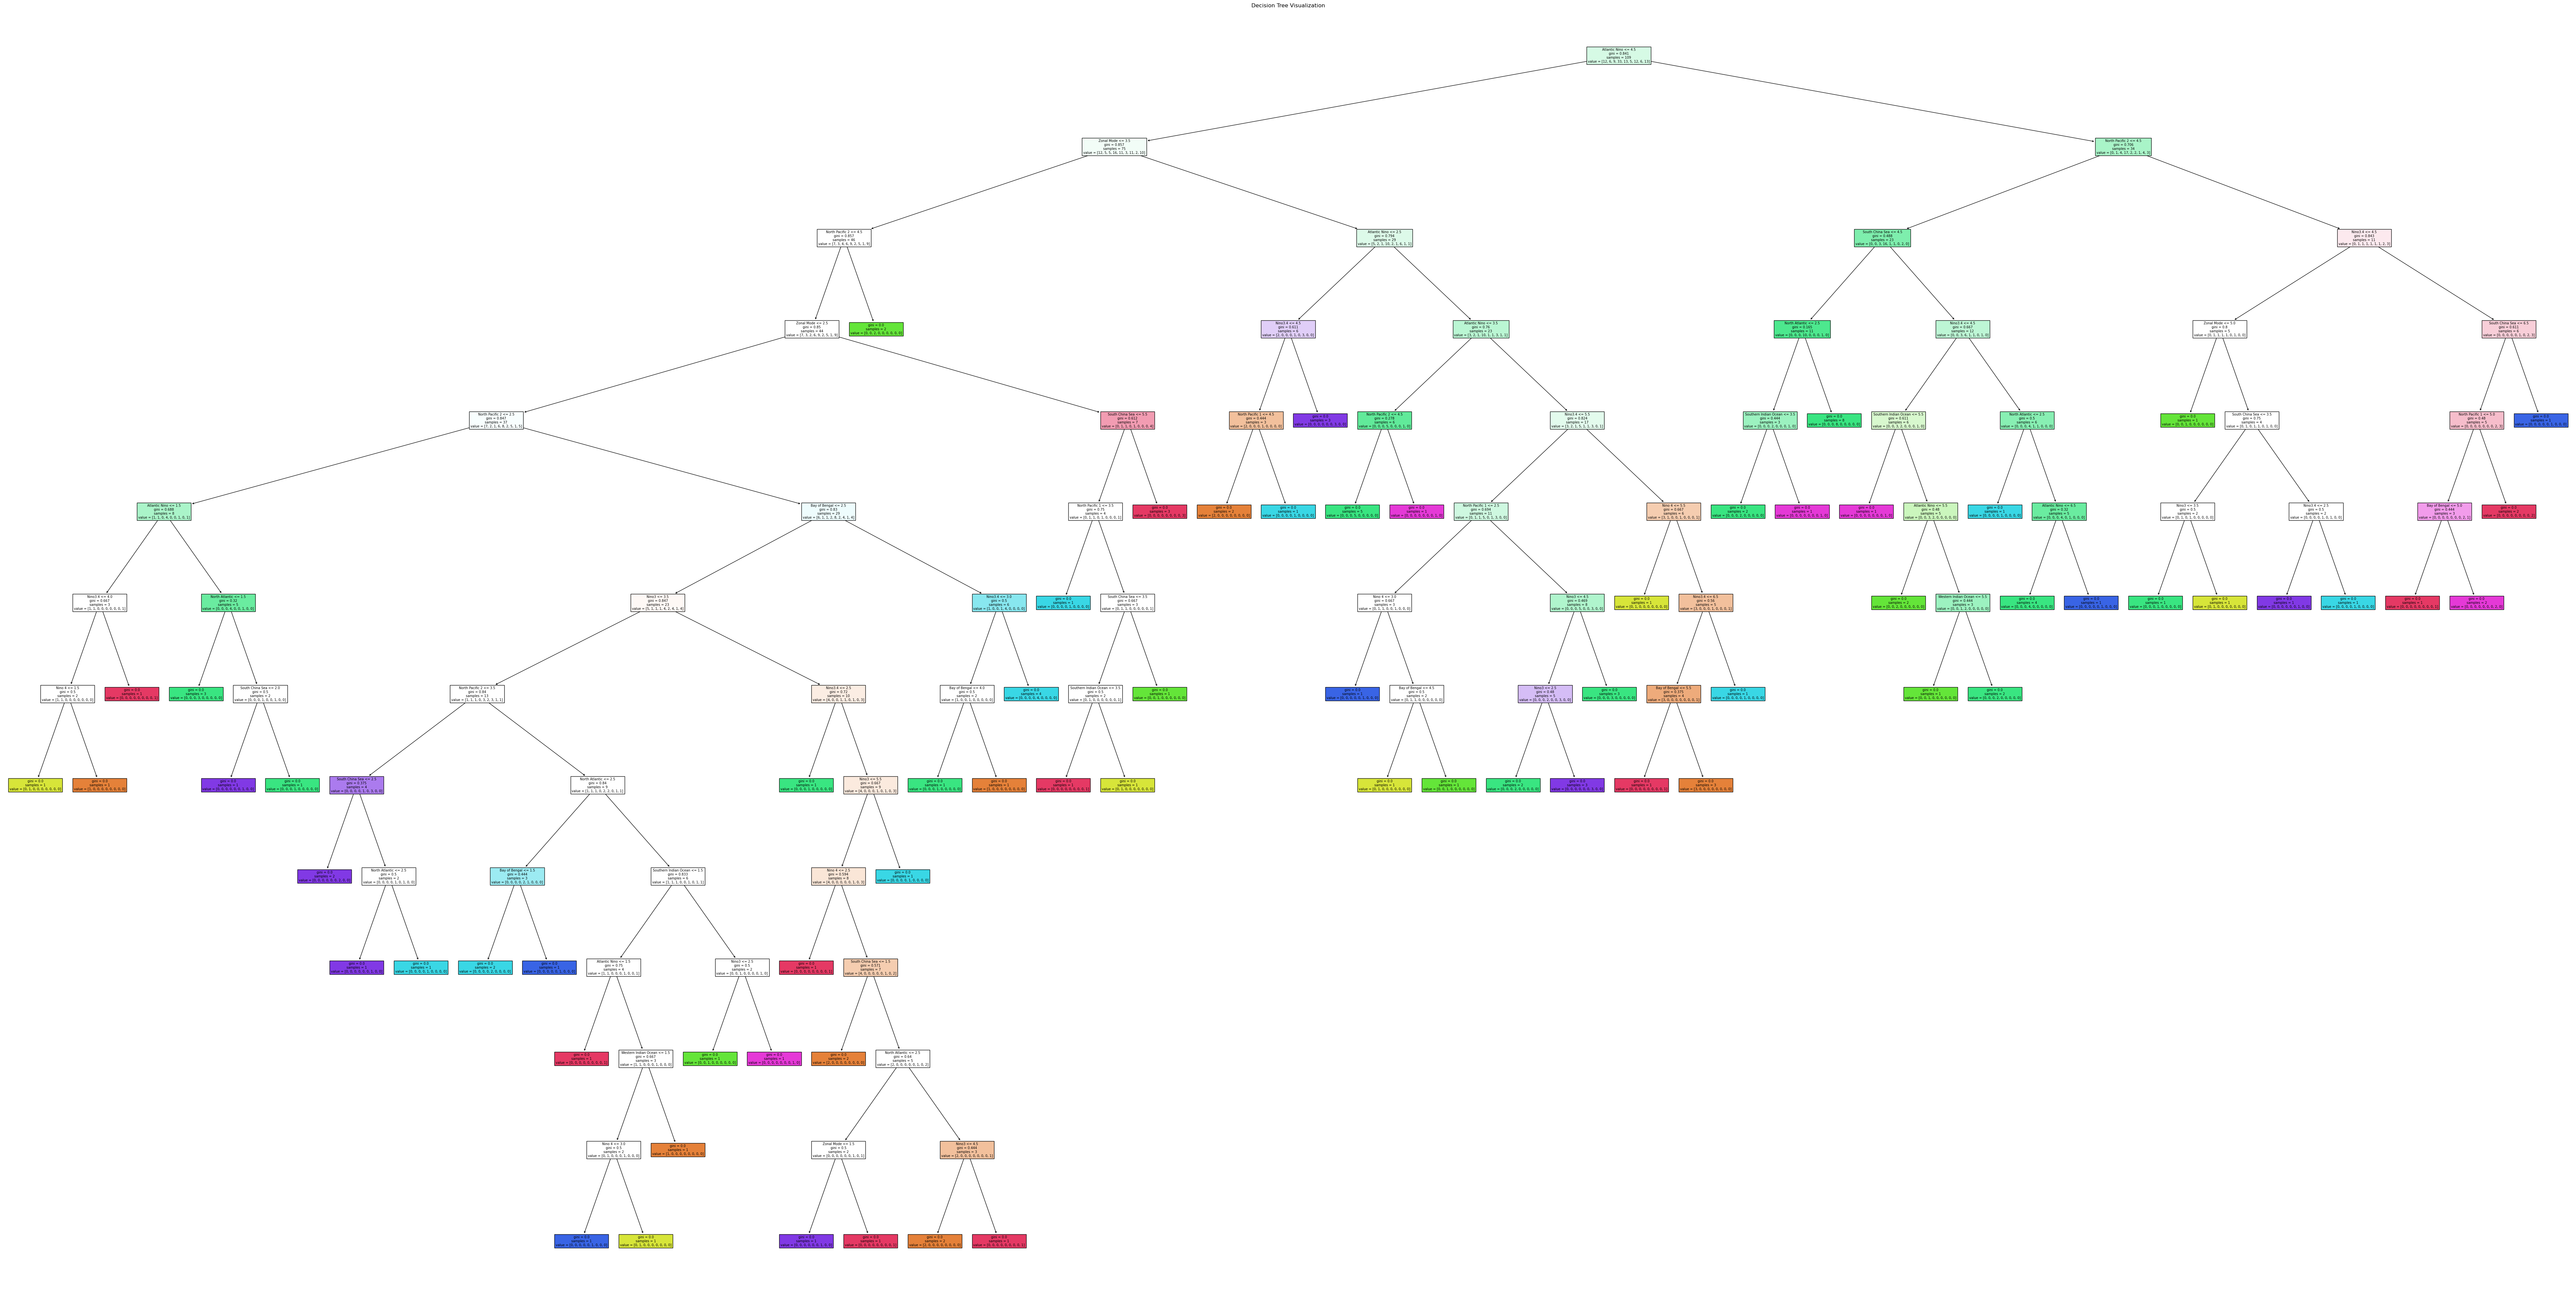

In [22]:
# Assuming you've already trained your Decision Tree classifier (clf)

cols=['Atlantic Nino', 'Bay of Bengal', 'Zonal Mode', 'Nino3', 'Nino3.4', 'Nino 4', 'North Atlantic', 'North Pacific 1', 'North Pacific 2', 'South China Sea', 'Southern Indian Ocean', 'Western Indian Ocean']


plt.figure(figsize=(100, 50))
tree.plot_tree(model, filled=True, feature_names=cols)
plt.title("Decision Tree Visualization")
#plt.savefig(f'CART.png', dpi=100, bbox_inches='tight')

plt.show()
